# WeatherPy
----



#### Analysis
Observed Trends
1. The max temperature of any given place correlates relatively strongly to its latitude (especially in the northern hemisphere). 
2. The results of each hemispheres analysis do not differentiate so much, except the max temp vs. latitude comparison. 
3. Humidity is consistently lower for cities between 0 and 40 degrees latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API URL info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [ ]:
# sample a city to see json
sample = requests.get(f'{query_url}chicago').json()
# sample

In [5]:
# set up lists to hold reponse info

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []

city_list = []

counter = 0
counterA=0
set=0

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    
    response_json = requests.get(query_url + city).json()
    
    try:
        
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        temp_max.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        
        city_list.append(city)
        
        counter += 1
        
        counterA += 1
        set=(counterA-1) // 50 +1
        
        if counter % 50 == 0:
            
          
            counter = 0
        
        print(f"Processing Record {counter} of set {set} | {city}")
    
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | barrow
Processing Record 2 of set 1 | ushuaia
Processing Record 3 of set 1 | tasiilaq
Processing Record 4 of set 1 | busselton
Processing Record 5 of set 1 | pevek
Processing Record 6 of set 1 | lebu
Processing Record 7 of set 1 | goderich
Processing Record 8 of set 1 | sao filipe
Processing Record 9 of set 1 | san ramon
Processing Record 10 of set 1 | hobart
Processing Record 11 of set 1 | husavik
Processing Record 12 of set 1 | tianpeng
Processing Record 13 of set 1 | ilam
Processing Record 14 of set 1 | ust-kut
Processing Record 15 of set 1 | kirakira
Processing Record 16 of set 1 | gravdal
Processing Record 17 of set 1 | lucea
City not found. Skipping...
Processing Record 18 of set 1 | siniscola
Processing Record 19 of set 1 | coxim
Processing Record 20 of set 1 | mar del plata
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of set 1 | khatanga
Processing Record 22 of 

Processing Record 37 of set 4 | eenhana
Processing Record 38 of set 4 | aasiaat
Processing Record 39 of set 4 | kudligi
Processing Record 40 of set 4 | viedma
Processing Record 41 of set 4 | pacific grove
Processing Record 42 of set 4 | rolla
Processing Record 43 of set 4 | omsukchan
Processing Record 44 of set 4 | lagoa vermelha
Processing Record 45 of set 4 | raga
Processing Record 46 of set 4 | saldanha
City not found. Skipping...
Processing Record 47 of set 4 | lompoc
Processing Record 48 of set 4 | saint anthony
Processing Record 49 of set 4 | padang
Processing Record 0 of set 4 | sabya
Processing Record 1 of set 5 | beringovskiy
Processing Record 2 of set 5 | almeirim
Processing Record 3 of set 5 | villazon
Processing Record 4 of set 5 | pierre
Processing Record 5 of set 5 | saskylakh
City not found. Skipping...
Processing Record 6 of set 5 | iralaya
Processing Record 7 of set 5 | tarakan
Processing Record 8 of set 5 | srednekolymsk
Processing Record 9 of set 5 | isangel
Processi

Processing Record 23 of set 8 | gopalganj
Processing Record 24 of set 8 | solnechnyy
Processing Record 25 of set 8 | naze
City not found. Skipping...
Processing Record 26 of set 8 | merauke
Processing Record 27 of set 8 | arbagar
Processing Record 28 of set 8 | orkney
Processing Record 29 of set 8 | araouane
Processing Record 30 of set 8 | le vauclin
Processing Record 31 of set 8 | gatesville
City not found. Skipping...
Processing Record 32 of set 8 | amapa
Processing Record 33 of set 8 | aksu
Processing Record 34 of set 8 | bunia
Processing Record 35 of set 8 | lagos
Processing Record 36 of set 8 | cap malheureux
Processing Record 37 of set 8 | codrington
Processing Record 38 of set 8 | bergneustadt
Processing Record 39 of set 8 | sinnar
Processing Record 40 of set 8 | itarema
Processing Record 41 of set 8 | dikson
Processing Record 42 of set 8 | rock sound
City not found. Skipping...
Processing Record 43 of set 8 | velikiy ustyug
Processing Record 44 of set 8 | kidderminster
Processi

Processing Record 11 of set 12 | ravar
Processing Record 12 of set 12 | simoes
Processing Record 13 of set 12 | basco
Processing Record 14 of set 12 | polyarnyy
Processing Record 15 of set 12 | hudiksvall
City not found. Skipping...
Processing Record 16 of set 12 | antofagasta
Processing Record 17 of set 12 | kushima
Processing Record 18 of set 12 | kizukuri
City not found. Skipping...
Processing Record 19 of set 12 | arona
Processing Record 20 of set 12 | grindavik
Processing Record 21 of set 12 | katobu
Processing Record 22 of set 12 | amuntai
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date })

city_data.to_csv(output_data_file)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-5.78,77,0,14.97,US,1649961022
1,ushuaia,-54.8000,-68.3000,53.22,54,20,13.80,AR,1649960870
2,tasiilaq,65.6145,-37.6368,32.16,100,100,2.84,GL,1649961085
3,busselton,-33.6500,115.3333,57.60,84,0,8.08,AU,1649961100
4,pevek,69.7008,170.3133,6.26,92,100,0.40,RU,1649961100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.083622,17.651176,60.914650,69.671329,54.979021,8.507203,1.649961e+09
std,33.285116,89.822904,22.335777,23.275108,41.205855,5.920970,1.018893e+02
min,-54.800000,-179.166700,-22.500000,7.000000,0.000000,0.000000,1.649960e+09
25%,-5.804200,-63.039200,46.215000,56.000000,9.000000,4.340000,1.649961e+09
50%,22.728800,23.156450,65.715000,75.000000,64.000000,6.910000,1.649961e+09
75%,48.332950,91.918925,78.705000,88.000000,100.000000,11.642500,1.649961e+09
max,78.218600,179.316700,99.120000,100.000000,100.000000,37.980000,1.649961e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity=city_data.loc[city_data["Humidity"]>100]["Humidity"]
print(humidity)

Series([], Name: Humidity, dtype: int64)


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=city_data.dropna(subset=city_data.loc[city_data["Humidity"]>100], how="any",inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-5.78,77,0,14.97,US,1649961022
1,ushuaia,-54.8000,-68.3000,53.22,54,20,13.80,AR,1649960870
2,tasiilaq,65.6145,-37.6368,32.16,100,100,2.84,GL,1649961085
3,busselton,-33.6500,115.3333,57.60,84,0,8.08,AU,1649961100
4,pevek,69.7008,170.3133,6.26,92,100,0.40,RU,1649961100
...,...,...,...,...,...,...,...,...,...
567,kizukuri,40.8061,140.3861,44.11,85,100,8.90,JP,1649961316
568,arona,28.0996,-16.6810,66.83,61,20,19.57,ES,1649961316
569,grindavik,63.8424,-22.4338,49.95,100,100,31.07,IS,1649961317
570,katobu,-4.9408,122.5276,75.16,91,74,1.66,ID,1649961317


In [ ]:
# Test to see if all data cleaned
# clean_city_data.loc[clean_city_data["Humidity"]>100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

In [12]:
from datetime import date

date = date.today() 
date

datetime.date(2022, 4, 14)

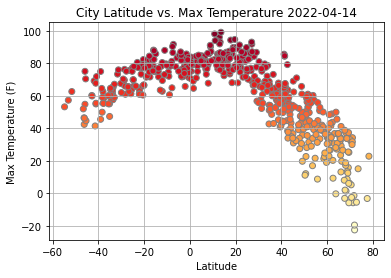

In [13]:
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']


plt.scatter(x, y, c=y, cmap='YlOrRd', edgecolor='gray')


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.title(f'City Latitude vs. Max Temperature {date}')
plt.grid()
plt.savefig('output_data/Lat_v_Temp.png')
plt.show()

City Latitude vs. Max Temperature notes:

The results of the scatter plot showed a correlation between latitude and temperature: the closer the latitude is to zero, the hotter the temperature is.

## Latitude vs. Humidity Plot

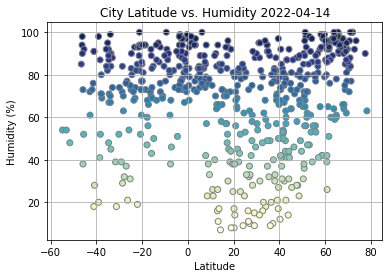

In [14]:
x = clean_city_data['Lat']
y = clean_city_data['Humidity']


plt.scatter(x, y, c=y, cmap='YlGnBu', edgecolor='gray')


plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


plt.title(f'City Latitude vs. Humidity {date}')
plt.grid()


plt.savefig('output_data/Lat_v_Humidity.png')

plt.show()

City Latitude vs. Humidity notes:

The results of the scatter plot showed less of a correlation than latitude vs. temperature, although one observation could be: overall humidity drops between 0 and 40 degrees latitude.

## Latitude vs. Cloudiness Plot

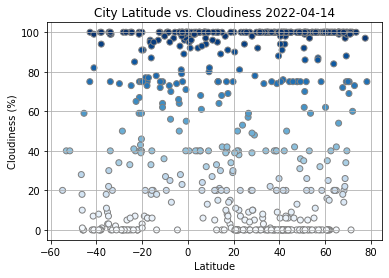

In [15]:
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']


plt.scatter(x, y, c=y, cmap='Blues', edgecolor='gray')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


plt.title(f'City Latitude vs. Cloudiness {date}')
plt.grid()


plt.savefig('output_data/Lat_v_Cloudiness.png')

plt.show()

City Latitude vs. Cloudiness notes:

The results of the scatter plot showed not so much a correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

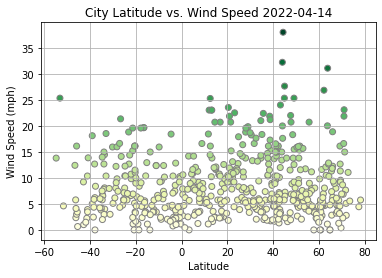

In [16]:
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']


plt.scatter(x, y, c=y, cmap='YlGn', edgecolor='gray')


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.grid()


plt.savefig('output_data/Lat_v_WindSpeed.png')

plt.show()

City Latitude vs. Wind Speed notes:

The results of the scatter plot showed little to no correlation between latitude and wind speed.
Somehow the cities barely have wind speed more than 25 mph.

## Linear Regression

In [17]:
def regressplot(x, y):
    
    
    correlation = st.pearsonr(x,y)

    print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
  
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [18]:
# Northern and Southern Hemisphere data
north_data = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_data = clean_city_data.loc[clean_city_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.75


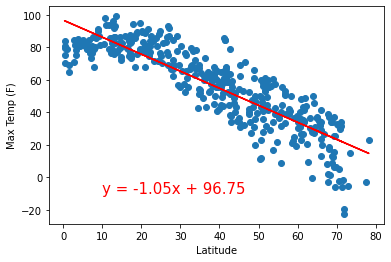

In [19]:
line_eq = regressplot(x = north_data['Lat'], y = north_data['Max Temp'])


plt.annotate(line_eq,(10,-10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig('output_data/North_Temp.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.52


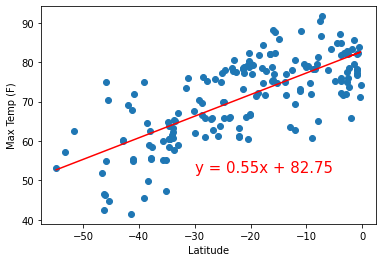

In [20]:
line_eq = regressplot(x = south_data['Lat'], y = south_data['Max Temp'])


plt.annotate(line_eq,(-30,52),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig('output_data/South_Temp.png')

plt.show()

Analysis of Latitude vs. Max Temp:

The correlation between these values in the Northern Hemisphere is relatively high.
The correlation between these values in the Southern Hemisphere is relatively lower. There is a slight increase in max temp as latitude approaches 0. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.05


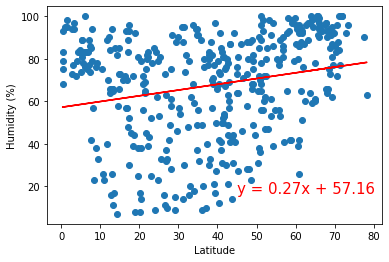

In [21]:
line_eq = regressplot(x = north_data['Lat'], y = north_data['Humidity'])


plt.annotate(line_eq,(45,17),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('output_data/North_Humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.07


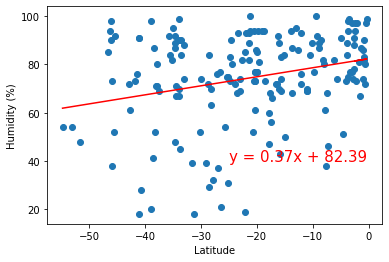

In [22]:
line_eq = regressplot(x = south_data['Lat'], y = south_data['Humidity'])


plt.annotate(line_eq,(-25,40),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('output_data/South_Humidity.png')

plt.show()

Analysis of Latitude vs. Humidity:

The correlation in both hemispheres is identical, but not high enough to demonstrate any real-world correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.01


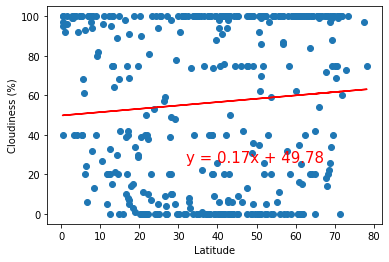

In [23]:
line_eq = regressplot(x = north_data['Lat'], y = north_data['Cloudiness'])


plt.annotate(line_eq,(32,26),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('output_data/North_Cloudiness.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.2


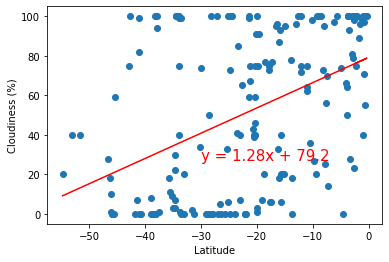

In [25]:
line_eq = regressplot(x = south_data['Lat'], y = south_data['Cloudiness'])


plt.annotate(line_eq,(-30,27),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('output_data/South_Cloudiness.png')

plt.show()

Analysis of Latitude vs. Cloudiness:

The correlation between these values in Sothern is a bit higher than Nothern hemisphere, the correlation in both hemispheres is not high enough to demonstrate any real-world correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0


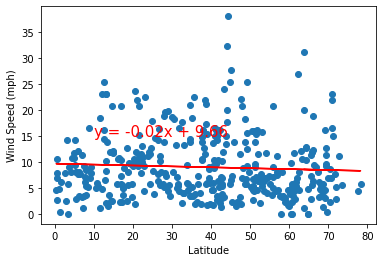

In [27]:
line_eq = regressplot(x = north_data['Lat'], y = north_data['Wind Speed'])


plt.annotate(line_eq,(10,15),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('output_data/North_WindSpeed.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.03


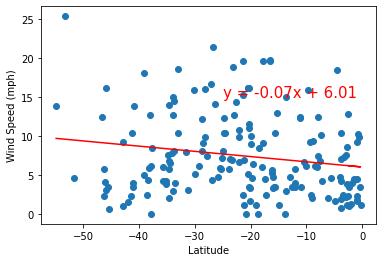

In [28]:
line_eq = regressplot(x = south_data['Lat'], y = south_data['Wind Speed'])


plt.annotate(line_eq,(-25,15),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('output_data/South_WindSpeed.png')

plt.show()

Analysis of Latitude vs. Wind Speed:

The correlation between these values is higher in the southern hemisphere: wind speed does seem to decrease as we approach the equator. As for the norther hemisphere, there is virtually no correlation.